## IA Les méthodes d'apprentissage supervisees


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import warnings
warnings.filterwarnings('ignore')

### L'algorithme KppV

Ce programme applique la méthode de discrimination de kppv sur un ensemble d'individu élément de R^2.



#### Les paramètres :

- La variable test :  
    Un tableau qui doit contenir les différents individus à classer rangés par colonne. Le nombre de ligne est 2 et le nombre de colonne est n.
    

- La variable apprentissage : 
    Un tableau qui doit contenir les différents individus de l'ensemble d'apprentissage rangés par colonne. Le nombre de ligne est 2 et le nombre de colonne est m.
    
    
    
- La variable oracle :
     Vecteur qui indique la classification de l'ensemble d'apprentissage oracle[i] indique le nombre de la classe de l'individu apprentissage[:i].
     
     
- La variable K :
   Indique le nombre de voisins utilisés dans l'algorithme.
   
#### Le résultat :

- La variable clas :
    Vecteur qui indique le résultat de l'algorithme de la discrimination clas[i] indique le numéro de la classe de l'individu x[:,i] 
   
 
   
   

### L'exemple de l'execution de l'algorithme

test = [ [3,2],[4,7],[8,9] ]

learn =[
     [ 0  2]
     [ 2  0]
     [ 2  6]
     [ 4  4]
     [ 2  4]
     [ 6  7]
     [10  4]
     [ 4  0]
     [ 4  2]
     [ 6  0]
     [ 6  2]
    ]
    
oracle= [0,0,1,1,0,1,0,0,0,1,1]

k=3

### on calcul distance-euclideanchaque l'élement de test avec l'ensemble des élements learn 

### Etape 1 :

#### 1 - calcul test[0]= [3,2]
    distance-euclidean [3 2]  et  [0 2]  est  3.0
    distance-euclidean [3 2]  et  [2 0]  est  2.23606797749979
    distance-euclidean [3 2]  et  [2 6]  est  4.123105625617661
    distance-euclidean [3 2]  et  [4 4]  est  2.23606797749979
    distance-euclidean [3 2]  et  [2 4]  est  2.23606797749979
    distance-euclidean [3 2]  et  [6 7]  est  5.830951894845301
    distance-euclidean [3 2]  et  [10  4]  est  7.280109889280518
    distance-euclidean [3 2]  et  [4 0]  est  2.23606797749979
    distance-euclidean [3 2]  et  [4 2]  est  1.0
    distance-euclidean [3 2]  et  [6 0]  est  3.605551275463989
    distance-euclidean [3 2]  et  [6 2]  est  3.0

#### 2 - calcul test[1]= [4,7]

    distance-euclidean [4 7]  et  [0 2]  est  6.4031242374328485
    distance-euclidean [4 7]  et  [2 0]  est  7.280109889280518
    distance-euclidean [4 7]  et  [2 6]  est  2.23606797749979
    distance-euclidean [4 7]  et  [4 4]  est  3.0
    distance-euclidean [4 7]  et  [2 4]  est  3.605551275463989
    distance-euclidean [4 7]  et  [6 7]  est  2.0
    distance-euclidean [4 7]  et  [10  4]  est  6.708203932499369
    distance-euclidean [4 7]  et  [4 0]  est  7.0
    distance-euclidean [4 7]  et  [4 2]  est  5.0
    distance-euclidean [4 7]  et  [6 0]  est  7.280109889280518
    distance-euclidean [4 7]  et  [6 2]  est  5.385164807134504

#### 1 - calcul test[2]= [8,9]

    distance-euclidean [8 9]  et  [0 2]  est  10.63014581273465
    distance-euclidean [8 9]  et  [2 0]  est  10.816653826391969
    distance-euclidean [8 9]  et  [2 6]  est  6.708203932499369
    distance-euclidean [8 9]  et  [4 4]  est  6.4031242374328485
    distance-euclidean [8 9]  et  [2 4]  est  7.810249675906654
    distance-euclidean [8 9]  et  [6 7]  est  2.8284271247461903
    distance-euclidean [8 9]  et  [10  4]  est  5.385164807134504
    distance-euclidean [8 9]  et  [4 0]  est  9.848857801796104
    distance-euclidean [8 9]  et  [4 2]  est  8.06225774829855
    distance-euclidean [8 9]  et  [6 0]  est  9.219544457292887
    distance-euclidean [8 9]  et  [6 2]  est  7.280109889280518
    
### Etape 2 :
#### On regarde les k distance minimales 

- pour test[0]=[3,2] sont :

        *    1.O  avec [4 2] indice dans learn 8 
        *    2.23 avec [2 0] indice dans learn 1
        *    2.23 avec [4 4] indice dans learn 3
        
- pour test[1]=[4,7] sont :
        
  
         * 2    avec  [6 7] indice dans learn 5
         * 2.23 avec  [2 6] indice dans learn 2
         * 3    avec  [4 4] indice dans learn 3
         
- pour test[2]=[8 9] sont :
    
        * 2.83 avec [6 7] indice dans learn  5
        * 5.38 avec [10 4] indice dans learn 6
        * 6.4 avec  [4 4] indice dans learn  3
        
### Etape 3 :
#### On regarder les classes/groupe dans des k distances minimales dans oracle 

- pour ***test[0]=[3,2]***   
    
    * oracle[8] = 0
    * oracle[1] = 0
    * oracle[3] = 1
    
    

- pour ***test[1]=[4,7]***  
    
    * oracle[5]= 1
    * oracle[2]= 1
    * oracle[3]= 1




- pour ****test[2]=[8,9]***  

    * oracle[5] = 1
    * oracle[6] = 0
    * oracle[3] = 1
    
### Etape 4 :
#### on vote , on regarde parmis les classes/groupes ce qui sont les plus nombreux 


- pour ***test[0]=[3,2]*** on voit qu'il est de la classe 0 



- pour ***test[1]=[4,7]*** on voit qu'il est de la classe 1



- pour ***test[2]=[8,9]*** on voit qu'il est de la classe 1



    

## L'implementation de l'algorithme KNNV en python 

In [2]:
def dist(x,y,dname='euclidean'):
    
    if (dname == 'manhattan') or (dname == 'cityblock'):
        d = np.sum(np.abs(x-y))
    elif dname == 'euclidean':
        d = np.sqrt(np.sum(np.abs(x-y)**2))
    elif (dname == 'chebychev') or (dname == 'chebyshev'):
        d = np.max(np.abs(x-y))
    elif dname == 'cosine':
        d = 1 - x.dot(y) / np.sqrt(x.dot(x)*y.dot(y))
    else:
        d = np.sqrt(np.sum(np.abs(x-y)**2))       
    return d

In [3]:
def KNNV(test, learn, ylearn, K=1, dname='euclidean'):
    test_nb = test.shape[0]
    learn_nb = learn.shape[0]
    labels_id = np.unique(ylearn)
    labels_nb = len(labels_id)
    dist_to_learn = np.zeros((test_nb, learn_nb))
    votes = np.zeros((test_nb,labels_nb)) 
    for i in range(test_nb):
        for j in range(learn_nb):
            dist_to_learn[i,j] = dist(test[i,:],learn[j,:],dname)  # Etape 1 
        KNN_index = np.argsort(dist_to_learn[i,:])[:K]             # Etape 2  argSort envoit les indices K des element d'un tableau 
        KNN_y = ylearn[[KNN_index]]                                # Etape 3 
        for j in range(labels_nb):
            votes[i,j] = len(np.argwhere(KNN_y==labels_id[j]))     # Etape 4 argWhere Trouvez les indices des éléments du tableau non nuls, regroupés par élément.
    ypred = np.argmax(votes,axis=1) # Returns the indices of the maximum values along an axis.
    return ypred


In [4]:
def affiche_classeKKpV(x,clas,K):
    for k in range(0,K):
        ind=(clas==k)
        plt.plot(x[0,ind],x[1,ind],"o")
    plt.show()

## Jeu d'essaie KNNV

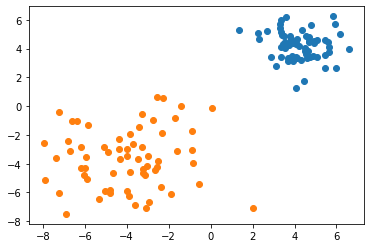

In [5]:
# Données de test
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]  

data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))

mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]]  

data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)

oracle=np.concatenate((np.zeros(128),np.ones(128)))

test1=np.transpose(np.random.multivariate_normal(mean1, cov1, 64))
test2=np.transpose(np.random.multivariate_normal(mean2, cov2,64))

test=np.concatenate((test1,test2), axis=1)
K=3
clas=KNNV(test.T,data.T,oracle,K)
affiche_classeKKpV(test,clas,2)

## Le Perceptron

## -  1 Mise en place d'un perceptron simple

Ce programme doit évaluer la sortie d'un perceptron simple ( 1 neurone ) pour une entrée élément de R^2.

### Les Paramètres :

    - La variable w contient les poids synaptiques du  neurones. C'est un vecteur à 3 lignes. La première ligne correspond au seuil.
    - La variable x contient l'éntrée du réseau de neurones. C'est un vecteur à 2 lignes.
    - La variable active indique la fonction d'activation utilisée. 
    
    * Si active == 0 :
      σ(x) = sign(x)
    * Si active == 1 :
      σ(x) = tanh(x)
      
### Le Résultat :

    - La variable y est un scalaire correspondant à la sortie du neurone
    
## - 2 Etude de l'apprentissage 
    
    
Ce programme retourne le poids de w obtenu par apprentissage selon la règle d'apprentissage utilisant la descente du gradient .


### Les paramètres :

 - La variable x contient l'ensemble d'apprentissage. C'est une matrice à 2 lignes et n colonnes.
 
 - La variable yd(i) indique la réponse désirée pour chaque élément x(:,i). 
 
 yd est un vecteur de 1 ligne et n colonnes de valeurs +1 ou -1 (classification à 2 classes).
 
 - On suggère d'utiliser 100 itérations 
 
 
### Le Résultat :

 - La variable w contient les poids synaptiques du neurone après apprentissage. C'est un vecteur à 3 lignes . La première ligne correspond au seuil.
 
 
 - La variable erreur contient l'erreur cumulée calculée pour le passage complet de l'ensemble d'apprentissage à savoir :
 
 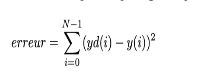
         
        
La variable erreur sera un vecteur de taille fixée par le nombre d'itération. Cela permettra de représenter l'évolution de l'erreur au cours des itérations de l'apprentissage.
 
    

### L'exemple de l'execution de l'algorithme

|     Xt      | Yt           |
|:------------|:------------:|
|   [2,0]     |   1          |
|   [0,3]     |   0          |
|   [3,0]     |   0          |
|   [1,1]     |   1          |


* Simulation avec biais α = 0.1 



* Initialisation w <- [0,0], b=0.5

### Pour chaque paire (Xt,Yt):

#### Etape 1 ***le perceptron***

    h(xt)=Threshold(z)
    
    où z= w*xt+b 
     
    et Threshold(z)=1 si z >=0 et 0 sinon
    
    
    # pour l'algo en dessous on utilise la focntion activation 
    # si active == 0 Threshold(z)= 
    
Pour x1=[2,0]
    
    h(x1)= [0,0]*[2 0] + 0.5 = 0.5
    
    donc 
    
    Threshold(0.5)= 1 
    
#### Etape 2  mettre à jour le ***w*** et le ***b***
    
    - Si h(xt) = yt , on ne fait pas de mise à jour 
    - Si h(xt) != yt , on fait la mise à jour 
        *  w = w + α(y2 - h(x2)) x2
        *  b = b + α(y2 - h(x2) 
    
puisque h(x1)=y1 , on ne fait pas de mise à jour 

On continue la boucle 

####  Pour x2=[0,3]

#### Etape 1 :
  
    h(x2)=[0,0]*[0,3]+0.5 = 1
    
#### Etape 2 :
     h(x2)!= y2
     
     - mise à jour :
     * w = [0,0] + 0.1 *(0-1) * [0,3] = [0,-0.3]
     * b = [0,0]+0.1*(0-1) = 0.4
    

On continue la boucle 

    
   


## L'implementation de l'algorithme le Perceptron en python 

In [8]:
# Le coefficient d'apprentissage α sera égal à 0.1 



def perceptron(x,w,active):
    z=np.dot(x,[w[0][1],w[0][2]]) + w[0][0]
    if active ==0:
        y= np.sign(z)
    else:
        y=np.tanh(z)
    return y
        
    
   

def apprentissage(x,yd,active):
    erreur=[]
    w=np.array([[0.5,0,0]])
    for _ in range(100):
        sum_erreur=0
        for i, x_i in enumerate(x):
            y=perceptron([ x_i[0],x_i[1] ],w,active) # Etape 1
            active=np.tanh(y)
            if(y!=yd[i]):  # Etape 2 
                # mise à jour w 
                tmp=[x_i[0],x_i[1]]
                val=0.1*(yd[i]-y)
                wtmp = np.add([w[0][1],w[0][2]],np.dot(val,tmp))
                w[0][1]=wtmp[0]
                w[0][2]=wtmp[1]
    
                # mise à jour b
                
                w[0][0]=w[0][0] + 0.1*( yd[i] -y)
                
                # calcul erreur 
                
                sum_erreur+=(yd[i]-y)**2
                
        erreur.append(sum_erreur)
        
    
    return w,erreur
   
def affiche_classe(x,clas,K,w):
    t=[np.min(x[0,:]),np.max(x[0,:])]
    z=[(-w[0,0]-w[0,1]*np.min(x[0,:]))/w[0,2],(-w[0,0]-w[0,1]*np.max(x[0,:]))/w[0,2]]
    plt.plot(t,z);
    ind=(clas==-1)
    plt.plot(x[0,ind],x[1,ind],"o")
    ind=(clas==1)
    plt.plot(x[0,ind],x[1,ind],"o")
    plt.show()


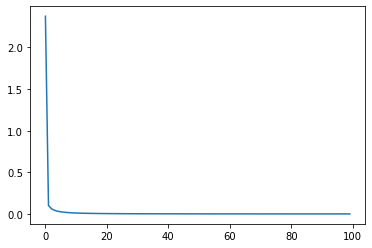

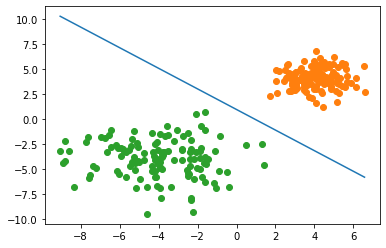

In [9]:
# Données de test
mean1 = [4, 4]
cov1 = [[1, 0], [0, 1]]  # 
data1 = np.transpose(np.random.multivariate_normal(mean1, cov1, 128))
mean2 = [-4, -4]
cov2 = [[4, 0], [0, 4]]  # 
data2 = np.transpose(np.random.multivariate_normal(mean2, cov2, 128))
data=np.concatenate((data1, data2), axis=1)
oracle=np.concatenate((np.zeros(128)-1,np.ones(128)))
w,mdiff=apprentissage(data.T,oracle,1)

plt.plot(mdiff)
plt.show()
affiche_classe(data,oracle,2,w)